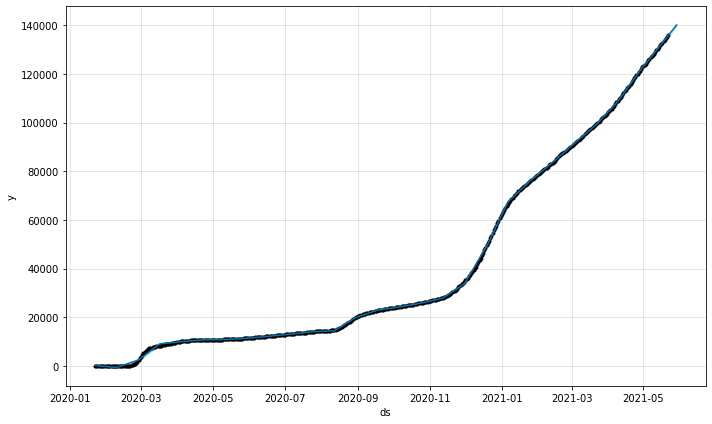

In [16]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

#참조 https://github.com/kairess/corona-virus-prediction
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(url, error_bad_lines=False)

df_korea = data[data['Country/Region'] == 'Korea, South']
df_korea = df_korea.T[4:]
df_korea = df_korea.reset_index().rename(columns={'index': 'date', 159: 'confirmed'})

#fbprophet을 이용한 확진자 수 예측
df_prophet = df_korea.rename(columns={
    'date': 'ds',
    'confirmed': 'y'
})

m = Prophet(changepoint_prior_scale=0.5, changepoint_range=0.95, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True, seasonality_mode='additive')
m.fit(df_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

m.plot(forecast)
plt.show()